In [1]:
import matplotlib.pyplot as plt
from PIL import Image


def show_image(url, size = (6,8)):
    img = Image.open(url)
    plt.figure(figsize = size)
    plt.axis('off')
    _ = plt.imshow(img, interpolation='lanczos')

# Keras functional API

### Sequential model

In [2]:
from keras.models import Sequential
from keras import layers

seq_model = Sequential()

seq_model.add(layers.Dense(32, activation='relu', input_shape=(64,)))
seq_model.add(layers.Dense(32, activation='relu'))
seq_model.add(layers.Dense(10, activation='softmax'))

seq_model.summary()

    

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 3,466
Trainable params: 3,466
Non-trainable params: 0
_________________________________________________________________


### Model graph visualistaion 


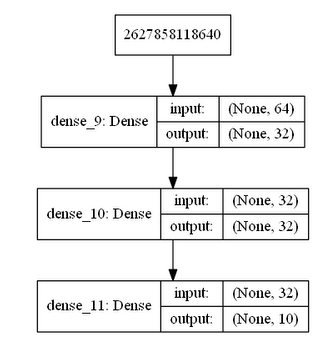

In [6]:
# We can use keras util
from keras.utils import plot_model
plot_model(seq_model, to_file='seq_model.png', show_shapes=True)
show_image('seq_model.png', size=(6,6))


### Functional API for defining any acyclic graph model

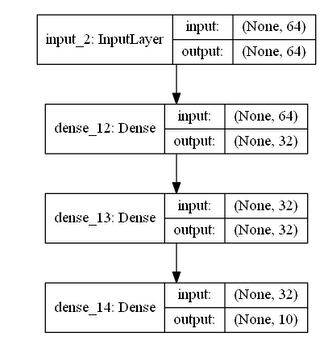

In [8]:
from keras.models import Model
from keras import Input

# Input is a tensor
input_tensor = Input(shape=(64,))

# Layer is a function that takes a tensor and returns a tensor
x = layers.Dense(32, activation='relu')(input_tensor)
x = layers.Dense(32, activation='relu')(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

# Model class turns an input and output tensor into a model
fun_model = Model(input_tensor, output_tensor)

# model.summary()

plot_model(fun_model, to_file='fun_model.png', show_shapes=True)
show_image('fun_model.png', size=(6,6))


In [9]:
# Graph need to be connected 
unrelated_input = Input(shape=(32,))
bad_model = Model(unrelated_input, output_tensor)

ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_2_3:0", shape=(?, 64), dtype=float32) at layer "input_2". The following previous layers were accessed without issue: []

In [16]:
# Compilation and fitting as before
fun_model.compile(optimizer='rmsprop', loss='categorical_crossentropy')

import numpy as np
x_test = x_train = np.random.random((1000, 64))
y_test = y_train = np.random.random((1000, 10))

fun_model.fit(x_train, y_train, epochs=10, batch_size=128)
score = fun_model.evaluate(x_test, y_test)

Epoch 1/10
1000/1000 [==============================] - 2s 2ms/step - loss: 11.4870
Epoch 2/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.4816
Epoch 3/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.4792
Epoch 4/10
1000/1000 [==============================] - 0s 28us/step - loss: 11.4776
Epoch 5/10
1000/1000 [==============================] - 0s 27us/step - loss: 11.4764
Epoch 6/10
1000/1000 [==============================] - 0s 26us/step - loss: 11.4749
Epoch 7/10
1000/1000 [==============================] - 0s 26us/step - loss: 11.4738
Epoch 8/10
1000/1000 [==============================] - 0s 27us/step - loss: 11.4723
Epoch 9/10
1000/1000 [==============================] - 0s 27us/step - loss: 11.4712
Epoch 10/10
1000/1000 [==============================] - 0s 73us/step


### Many inputs

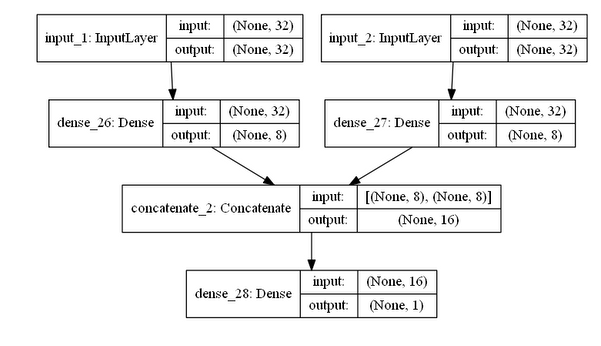

In [18]:
from keras.models import Model
from keras import layers
from keras import Input
import keras
import numpy as np


input_1 = layers.Input(shape=(32,), name='input_1')
x_1 = layers.Dense(8, activation='relu')(input_1)

input_2 = layers.Input(shape=(32,), name='input_2')
x_2 = layers.Dense(8, activation='relu')(input_2)


#added = layers.Add()([x_1, x_2])
#max = layers.Maximum([x_1, x_2])
con = layers.Concatenate()([x_1, x_2])
# ...


output = layers.Dense(1)(con)

many_inputs_model = Model(inputs=[input_1, input_2], outputs=output)

# model.summary()
plot_model(many_inputs_model, to_file='model2.png', show_shapes=True)
show_image('model2.png', size=(10,12))

### Many outputs

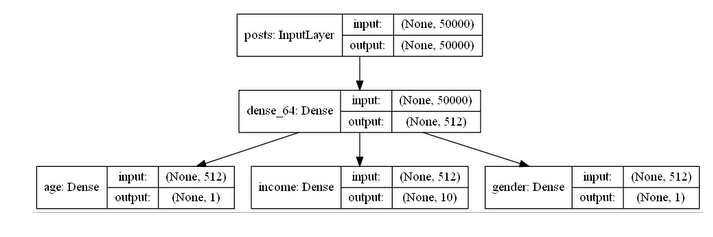

In [63]:
# Assume we try to predict age, income, gander based on posts
vocabulary_size = 50000
num_income_groups = 10

posts_input = Input(shape=(vocabulary_size,), dtype='float', name='posts')

x = layers.Dense(512, activation='relu')(posts_input)

age = layers.Dense(1, name='age')(x)
income = layers.Dense(num_income_groups, activation='softmax', name='income')(x)
gender = layers.Dense(1, activation='sigmoid', name='gender')(x)

many_outputs_model = Model(posts_input, [age, income, gender])
# model.summary()
plot_model(many_outputs_model, to_file='model_many_outputs.png', show_shapes=True)
show_image('model_many_outputs.png', size=(12,14))


# We have many loss function that need to be combined into one to use SGD
# If the mean squared error (MSE) loss  used for the age-regression task 
# typically takes a value around 3–5, whereas the crossentropy loss used 
# for the gender-classification task can be as low as 0.1, then to balance
# the contribution of the different losses, you can assign a weight of 10
# to the crossentropy loss and a weight of 0.25 to the MSE loss.

many_outputs_model.compile(optimizer='rmsprop',
loss=['mse', 'categorical_crossentropy', 'binary_crossentropy'],
loss_weights=[0.25, 1., 10.])

# model.fit(posts, [age_targets, income_targets, gender_targets], 
#           epochs=10, batch_size=64)

### Inception architecture

https://towardsdatascience.com/a-simple-guide-to-the-versions-of-the-inception-network-7fc52b863202

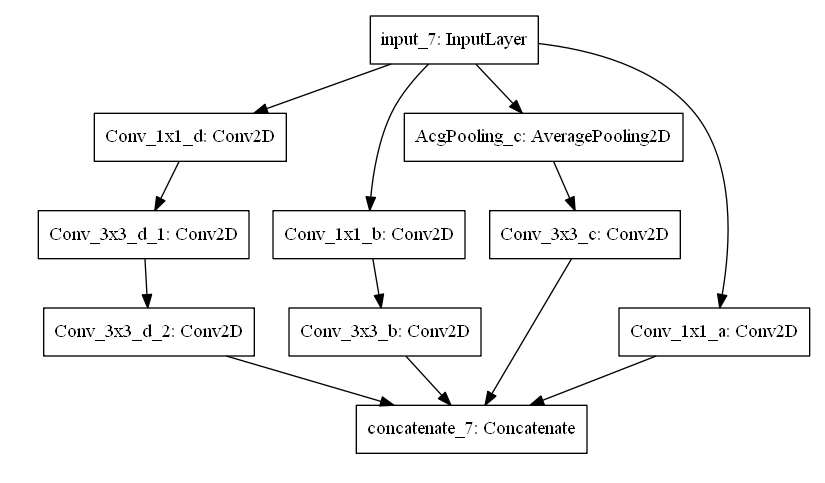

In [48]:


input = Input(shape=(224,224,3))

branch_a = layers.Conv2D(128, 1, activation='relu', strides=2, name='Conv_1x1_a')(input)

branch_b = layers.Conv2D(128, 1, activation='relu',name='Conv_1x1_b')(input)
branch_b = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same', name='Conv_3x3_b')(branch_b)

branch_c = layers.AveragePooling2D(3, strides=2, padding='same',name='AcgPooling_c')(input)
branch_c = layers.Conv2D(128, 3, activation='relu', padding='same',name='Conv_3x3_c' )(branch_c)

branch_d = layers.Conv2D(128, 1, activation='relu',name='Conv_1x1_d')(input)
branch_d = layers.Conv2D(128, 3, activation='relu', padding='same',name='Conv_3x3_d_1')(branch_d)
branch_d = layers.Conv2D(128, 3, activation='relu', strides=2, padding='same',name='Conv_3x3_d_2')(branch_d)

output = layers.concatenate([branch_a, branch_b, branch_c, branch_d], axis=-1)

model = Model(input, output)
# model.summary()
plot_model(model, to_file='model_inception.png')
show_image('model_inception.png', size=(14,16))


### Residual connections

Representational bottlenecks in deep learning 

In a Sequential model, each successive representation layer is built on top of the
previous one, which means it only has access to information contained in the activation
of the previous layer. If one layer is too small (for example, it has features that
are too low-dimensional), then the model will be constrained by how much information
can be crammed into the activations of this layer. Any loss of information is permanent. Residual connections, by reinjecting earlier information downstream, partially solve this issue for deep-learning models.

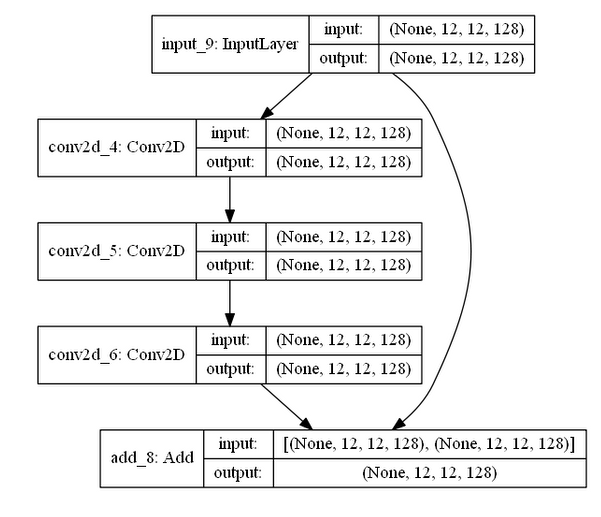

In [50]:
x = Input(shape=(12,12,128))

y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)

y = layers.add([y, x])

model = Model(x, y)
# model.summary()
plot_model(model, show_shapes=True, to_file='model_residual.png')
show_image('model_residual.png', size=(10,11))


# If we change the shape we need to adjust the original input to use add operation

# y = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
# y = layers.Conv2D(128, 3, activation='relu', padding='same')(y)
# y = layers.MaxPooling2D(2, strides=2)(y)

# residual = layers.Conv2D(128, 1, strides=2, padding='same')(x)

# y = layers.add([y, residual])